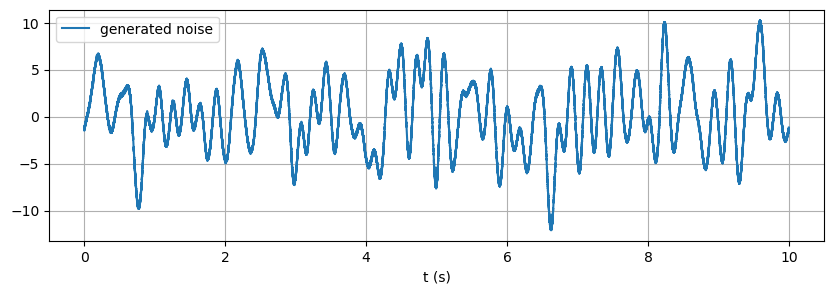

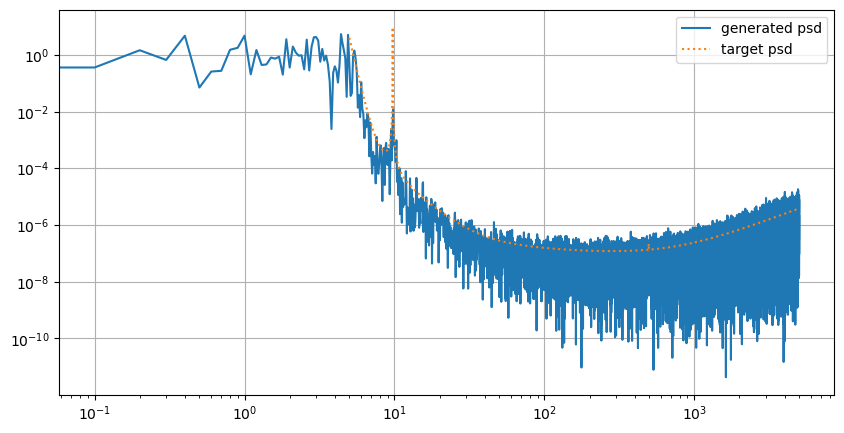

In [8]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from dataset import noise

fs = 10000
N = 10 * fs
scale = 1e+20

rng_key = jax.random.PRNGKey(0)
generated_noise = noise.generate(rng_key, 1/fs, N, colour=noise.LIGOL(scale))

plt.figure(figsize=(10, 3))
plt.plot(jnp.linspace(0, N/fs, N), generated_noise, label="generated noise")
plt.xlabel("t (s)")
plt.legend()
plt.grid()

plt.figure(figsize=(10, 5))
freqs = jnp.fft.fftfreq(N, 1/fs)
psd = jnp.abs(jnp.fft.fft(generated_noise))**2*(1/(N*fs))
plt.loglog(freqs[:N//2], psd[:N//2], label="generated psd")

frequencies, sqrt_psds = np.loadtxt("dataset/LIGOL_noise_psd.txt", dtype="double", unpack=True)
plt.loglog(frequencies, (scale*sqrt_psds)**2, ":", label="target psd")
plt.grid()
plt.legend()
plt.show()